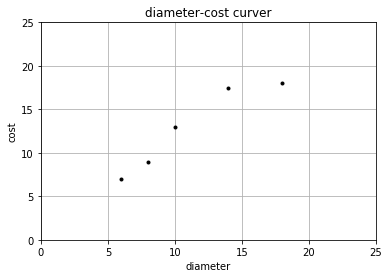

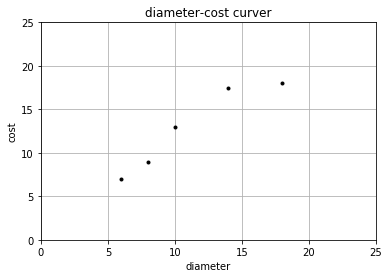

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

def runplt():
    plt.figure()
    plt.title(u'diameter-cost curver')
    plt.xlabel(u'diameter')
    plt.ylabel(u'cost')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    return plt

plt = runplt()
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.plot(X, y, 'k.')
plt.show()
def runplt():
    plt.figure()
    plt.title(u'diameter-cost curver')
    plt.xlabel(u'diameter')
    plt.ylabel(u'cost')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    return plt

plt = runplt()
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.plot(X, y, 'k.')
plt.show()

预测一张12英寸匹萨价格：$13.68


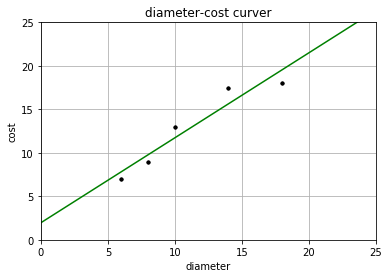

In [3]:
#线性回归
from sklearn.linear_model import LinearRegression
import numpy as np
# 创建并拟合模型
model = LinearRegression()
model.fit(X, y)
print('预测一张12英寸匹萨价格：$%.2f' % model.predict(np.array([12]).reshape(-1, 1))[0])

plt = runplt()
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')
plt.show()
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html



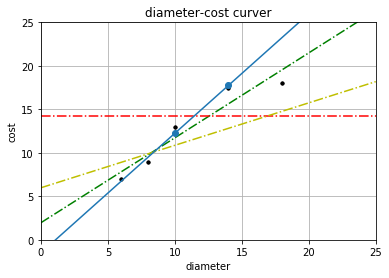

In [6]:
#不同拟合曲线
plt = runplt()
plt.plot(X, y, 'k.')
y3 = [14.25, 14.25, 14.25, 14.25]
y4 = y2 * 0.5 + 5
model.fit(X[1:-1], y[1:-1])
y5 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-.')
plt.plot(X2, y3, 'r-.')
plt.plot(X2, y4, 'y-.')
plt.plot(X2, y5, 'o-')
plt.show()



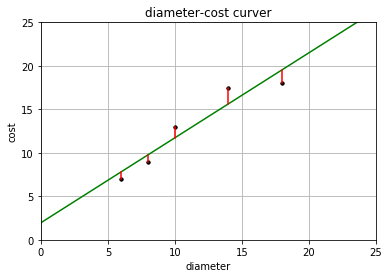

In [54]:
#损失函数
plt = runplt()
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')

# 残差预测值
yr = model.predict(X)
for idx, x in enumerate(X):
    plt.plot([x, x], [y[idx], yr[idx]], 'r-')

plt.show()



In [55]:

import numpy as np
print('残差平方和: %.2f' % np.mean((model.predict(X) - y) ** 2))

##模型验证
#acc = model.score(model.predict(X), y)
#print("acc:",acc)

from sklearn.metrics import r2_score
score = r2_score(y,model.predict(X))
print('模型的R方值:',score)


残差平方和: 1.75
模型的R方值: 0.9100015964240102


In [5]:


#多元回归
from sklearn.linear_model import LinearRegression
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
score = r2_score(y_test,model.predict(X_test))
print('模型的R方值:',score)





Predicted: [10.0625], Target: [11]
Predicted: [10.28125], Target: [8.5]
Predicted: [13.09375], Target: [15]
Predicted: [18.14583333], Target: [18]
Predicted: [13.3125], Target: [11]


NameError: name 'r2_score' is not defined

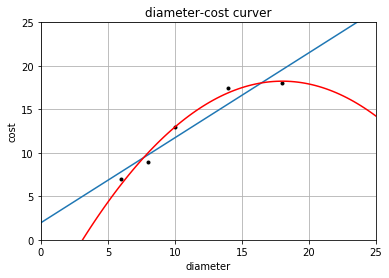

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
模型的R方值: 0.809726797707665 0.8675443656345108


In [58]:


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
# 建立线性回归，并用训练的模型绘图
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)#测试样本
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt = runplt()
plt.plot(X_train, y_train, 'k.')#样本点
plt.plot(xx, yy)#预测线

quadratic_featurizer = PolynomialFeatures(degree=2)# 实例化一个2次多项式特征实例
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')
plt.show()
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)

#print('1 r-squared', regressor.score(X_test, y_test))
#print('2 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))


score1 = r2_score(y_test,regressor.predict(X_test))
score2 = r2_score(y_test,regressor_quadratic.predict(X_test_quadratic))
print('模型的R方值:',score1,score2)



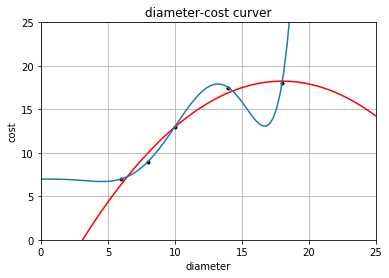

2 r-squared 0.8675443656345108
7 r-squared 0.4919846056864849


In [59]:
#7阶
plt = runplt()
plt.plot(X_train, y_train, 'k.')

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')

seventh_featurizer = PolynomialFeatures(degree=7)
X_train_seventh = seventh_featurizer.fit_transform(X_train)
X_test_seventh = seventh_featurizer.transform(X_test)
regressor_seventh = LinearRegression()
regressor_seventh.fit(X_train_seventh, y_train)
xx_seventh = seventh_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_seventh.predict(xx_seventh))
plt.show()
print('2 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))
print('7 r-squared', regressor_seventh.score(X_test_seventh, y_test))
